In [2]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import numba
import IPython.display as ipd

In [62]:
path = "/content/Speaker26_000.wav"
x, sr = librosa.load("/content/Speaker26_000.wav") # x is vector representation and sr is sample rate
print(type(x))
print(type(sr))

<class 'numpy.ndarray'>
<class 'int'>


In [57]:
# Playing Audio
ipd.Audio(path)

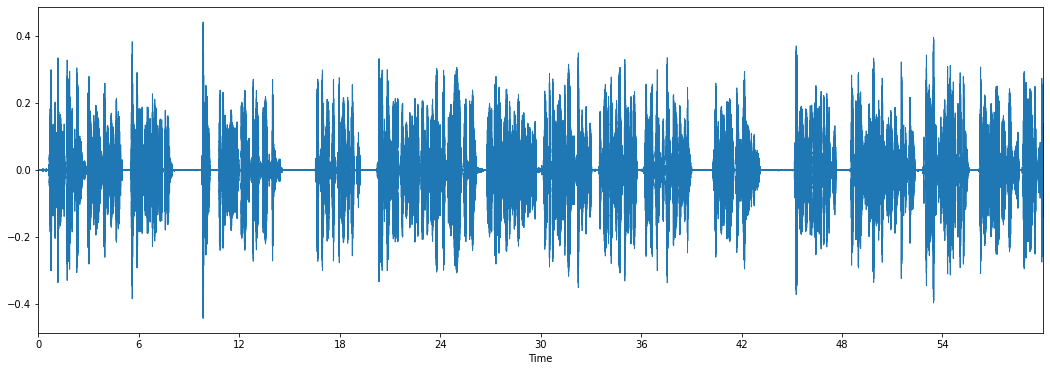

In [63]:
# Plot the signal
plt.figure(figsize = (18,6))
librosa.display.waveplot(x, sr=sr)
plt.show()

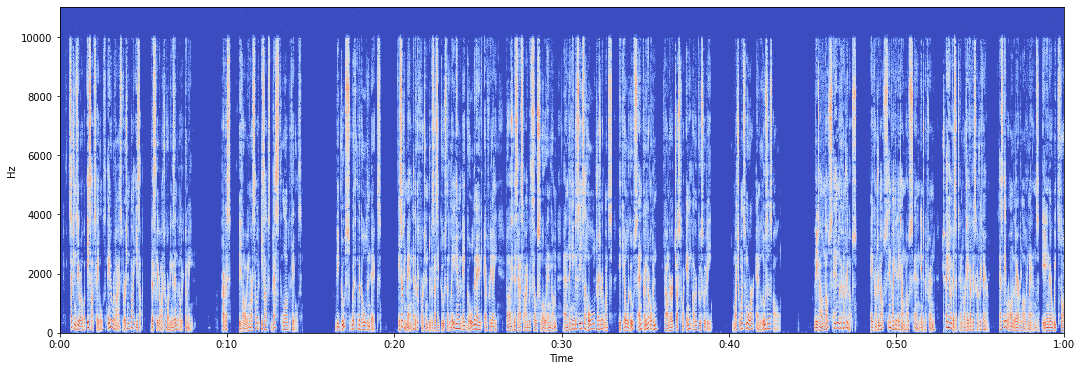

In [41]:
# Display Spectogram
x = librosa.stft(x)
xdb = librosa.amplitude_to_db(abs(x))
plt.figure(figsize=(18,6))
librosa.display.specshow(xdb, x_axis = 'time', y_axis = 'hz', sr =sr)
plt.show()


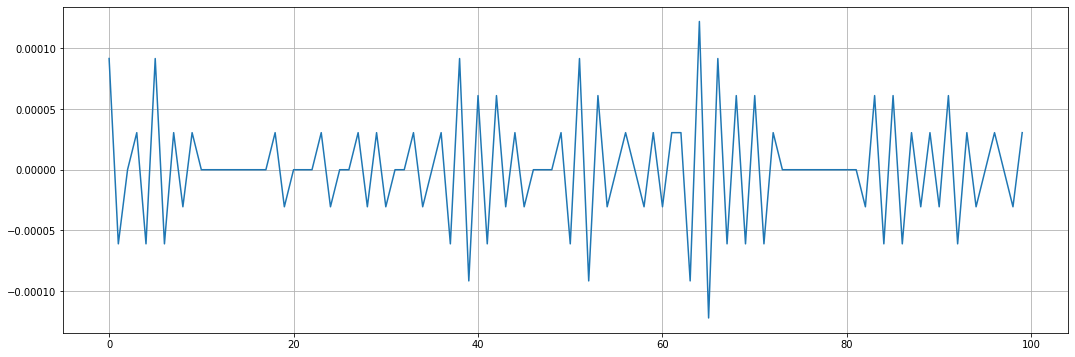

In [66]:
# Zero Crossing Rate (changing its direction w.r.t time from positive to negative)
n0 = 1000
n1 = 1100
plt.figure(figsize=(18,6))
plt.plot(x[n0:n1],)
plt.grid()

In [67]:
zero_crossing = librosa.zero_crossings(x[n0:n1], pad = False)
print(sum(zero_crossing))

64


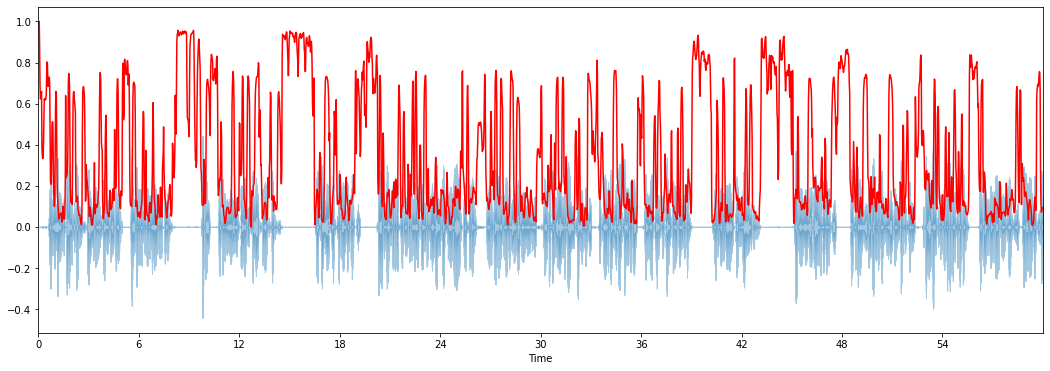

In [68]:
# Spectral Centroid
spectral_centroid = librosa.feature.spectral_centroid(x , sr = sr)[0]
frames = range(len(spectral_centroid))
t = librosa.frames_to_time(frames)

def Normalize(x, axis = 0):
  return sklearn.preprocessing.minmax_scale(x, axis = axis)

plt.figure(figsize=(18,6))
librosa.display.waveplot(x, sr = sr, alpha = 0.4)
plt.plot(t, Normalize(spectral_centroid), color = 'r')
plt.show()

[]

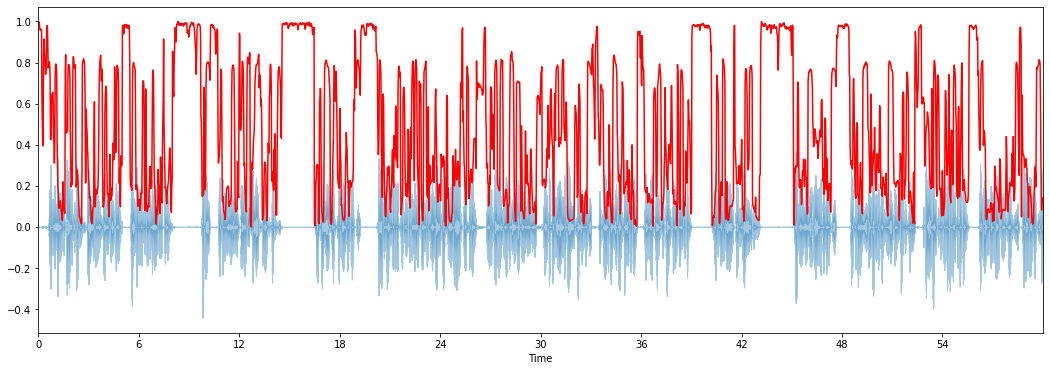

In [71]:
# Spectral RollOff
spectral_rolloff = librosa.feature.spectral_rolloff(x, sr = sr)[0]
plt.figure(figsize=(18,6))
librosa.display.waveplot(x, sr = sr, alpha = 0.4)
plt.plot(t, Normalize(spectral_rolloff), color = 'r')
plt.plot()

(20, 2585)


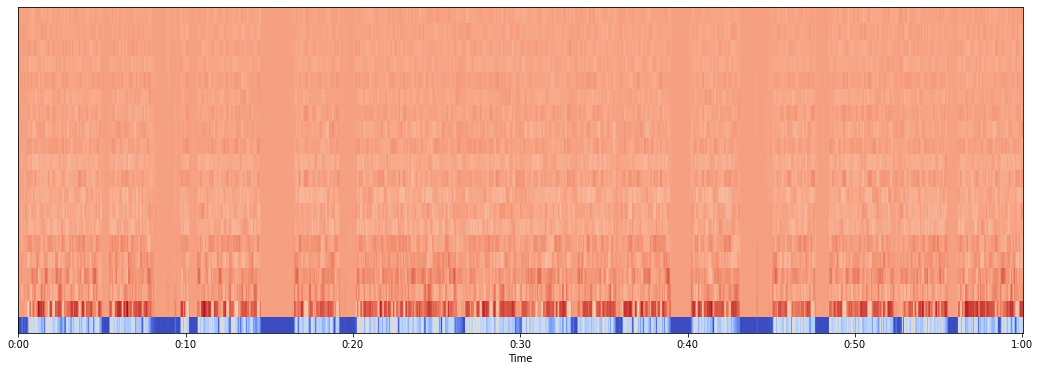

In [72]:
# MFCC (Mel Frequency Cepstral Coefficients)

mfcc = librosa.feature.mfcc(x, sr = sr)
print(mfcc.shape)
plt.figure(figsize=(18,6))
librosa.display.specshow(mfcc, sr = sr, x_axis = 'time')
plt.show()